In [73]:
import numpy as np
import tensorflow as tf
import helpers
tf.reset_default_graph()
sess = tf.InteractiveSession()

encoder_inputs = tf.placeholder(shape = (None, None), dtype = tf.int32)
decoder_targets = tf.placeholder(shape = (None, None), dtype = tf.int32)
decoder_inputs = tf.placeholder(shape = (None, None), dtype = tf.int32)

In [2]:
#get in the data
chinese = []
english_phoeneme = []
with open('dataset.txt') as f:
    for line in f:
        temp = line.split('\t')
        chinese.append(temp[1])
        english_phoeneme.append(temp[2])
english_phoeneme = [phoeneme.split('\n')[0].split() for phoeneme in english_phoeneme]
chinese = [list(word) for word in chinese]


In [3]:
def prepare_vocab_input():
    vocab_inputs = []
    with open('./english_phoneme_vocabulary_output.txt') as file:
        for line in file:
            vocab_inputs.append(line.split('\n')[0])
    vocab_inputs.remove('_PAD')
    vocab_inputs.remove('_GO')
    vocab_inputs.remove('_EOS')
    vocab_inputs.remove('_UNK')
    vocab_inputs = ['PAD', 'EOS'] + (vocab_inputs)
    return vocab_inputs

In [4]:
def prepare_vocab_predict():
    vocab_predict = list(chinese_id_dict.keys())
    return vocab_predict

In [5]:
# prepare chinese_id_dict
chinese_id_list = []
with open('./chinese_vocabulary.txt') as file7:
    for line in file7:
        chinese_id_list.append(line.split('\n')[0])
chinese_id_list = ['PAD', 'EOS'] + chinese_id_list
chinese_id_dict = {}
for i in range(len(chinese_id_list)):
    chinese_id_dict[chinese_id_list[i]] = i
# finish preparation for chinese_id_dict

In [51]:
english_phoneme_dict = {}
for i in range(len(vocab_inputs)):
    english_phoneme_dict[vocab_inputs[i]] = i

In [63]:
vocab_inputs = prepare_vocab_input()
vocab_predict = prepare_vocab_predict()

In [74]:
PAD = 0
EOS = 1

vocab_size = len(vocab_inputs)
input_embedding_size = 41

encoder_hidden_units = 20
decoder_hidden_units = encoder_hidden_units*2

In [75]:
encoder_inputs = tf.placeholder(shape=(None, None), dtype=tf.int32, name='encoder_inputs')
encoder_inputs_length = tf.placeholder(shape=(None,), dtype=tf.int32, name='encoder_inputs_length')
decoder_targets = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_targets')

#### Embeddings

In [76]:
embeddings = tf.Variable(tf.random_uniform([vocab_size, input_embedding_size], -1.0, 1.0), dtype=tf.float32)
encoder_inputs_embedded = tf.nn.embedding_lookup(embeddings, encoder_inputs)

#### Encoder

In [77]:
from tensorflow.contrib.rnn import LSTMCell, LSTMStateTuple

In [78]:
encoder_cell = LSTMCell(encoder_hidden_units)

In [79]:
with tf.variable_scope('encoder_cell',reuse=False):
    ((encoder_fw_outputs,
      encoder_bw_outputs),
     (encoder_fw_final_state,
      encoder_bw_final_state)) = (
        tf.nn.bidirectional_dynamic_rnn(cell_fw=encoder_cell,
                                    cell_bw=encoder_cell,
                                    inputs=encoder_inputs_embedded,
                                    sequence_length=encoder_inputs_length,
                                    dtype=tf.float32, time_major=True)
        )

ValueError: Attempt to reuse RNNCell <tensorflow.contrib.rnn.python.ops.core_rnn_cell_impl.LSTMCell object at 0x120ef5780> with a different variable scope than its first use.  First use of cell was with scope 'encoder_cell/bidirectional_rnn/fw/lstm_cell', this attempt is with scope 'encoder_cell/bidirectional_rnn/bw/lstm_cell'.  Please create a new instance of the cell if you would like it to use a different set of weights.  If before you were using: MultiRNNCell([LSTMCell(...)] * num_layers), change to: MultiRNNCell([LSTMCell(...) for _ in range(num_layers)]).  If before you were using the same cell instance as both the forward and reverse cell of a bidirectional RNN, simply create two instances (one for forward, one for reverse).  In May 2017, we will start transitioning this cell's behavior to use existing stored weights, if any, when it is called with scope=None (which can lead to silent model degradation, so this error will remain until then.)

In [ ]:
embeddings = tf.Variable(tf.random_uniform([len(vocab_inputs), greatestvalue_predict], -1.0, 1.0), dtype=tf.float32)

In [8]:
greatestvalue_predict = 42
encoder_embeddings = tf.Variable(tf.random_uniform([len(vocab_inputs), greatestvalue_predict]
                                                   , -1.0, 1.0), dtype = tf.float32)

decoder_embeddings = tf.Variable(tf.random_uniform([len(vocab_predict), greatestvalue_predict]
                                                   , -1.0, 1.0), dtype = tf.float32)


encoder_inputs_embedded = tf.nn.embedding_lookup(encoder_embeddings, encoder_inputs)
decoder_inputs_embedded = tf.nn.embedding_lookup(decoder_embeddings, decoder_inputs)

In [9]:
print(tf.nn.bidirectional_dynamic_rnn)

<function bidirectional_dynamic_rnn at 0x114ae2c80>


### Encoder

In [35]:
hidden = 200

encoder_cell = tf.contrib.rnn.LSTMCell(hidden)

In [36]:
# RNN size of greatestvalue_inputs
#hidden = 100
#used to be greatestvalue_predict
#encoder_cell = tf.contrib.rnn.LSTMCell(hidden, state_is_tuple=True, reuse=tf.get_variable_scope().reuse)


#cells=[]
#for _ in range(2):
#    cell = create_lstm_cell(config)
#    cells.append(cell)

# 2 layers of RNN
#encoder_rnn_cells =tf.contrib.rnn.MultiRNNCell([encoder_cell for _ in range(2)])
#encoder_rnn_cells = tf.contrib.rnn.MultiRNNCell([encoder_cell for _ in range(2)])




#this is adding multi-layer-should be fine here
#cells=[]
#for _ in range(2):
#    cell = tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.GRUCell(hidden), input_keep_prob=0.5)
#    cells.append(cell)
#multicell = tf.contrib.rnn.MultiRNNCell(cells, state_is_tuple=False)




#add dropout layer here
#dropout_lstm_encoder = tf.contrib.rnn.DropoutWrapper(encoder_rnn_cells, input_keep_prob=0.5)


#_, encoder_final_state = tf.nn.dynamic_rnn(multicell, encoder_inputs_embedded,
                                           #dtype = tf.float32, time_major = True)

# bidirectional layer here
((encoder_fw_outputs,
  encoder_bw_outputs),
 (encoder_fw_final_state,
  encoder_bw_final_state)) = (
    tf.nn.bidirectional_dynamic_rnn(cell_fw=encoder_cell,
                                    cell_bw=encoder_cell,
                                    inputs=encoder_inputs_embedded,
                                    sequence_length=encoder_inputs_length,
                                    dtype=tf.float64, time_major=True)
    )

TypeError: Tensors in list passed to 'values' of 'ConcatV2' Op have types [float32, float64] that don't all match.

In [33]:

#Concatenates tensors along one dimension.
encoder_outputs = tf.concat((encoder_fw_outputs, encoder_bw_outputs), 2)

#letters h and c are commonly used to denote "output value" and "cell state". 
#http://colah.github.io/posts/2015-08-Understanding-LSTMs/ 
#Those tensors represent combined internal state of the cell, and should be passed together. 

encoder_final_state_c = tf.concat(
    (encoder_fw_final_state.c, encoder_bw_final_state.c), 1)

encoder_final_state_h = tf.concat(
    (encoder_fw_final_state.h, encoder_bw_final_state.h), 1)

#TF Tuple used by LSTM Cells for state_size, zero_state, and output state.
encoder_final_state = LSTMStateTuple(
    c=encoder_final_state_c,
    h=encoder_final_state_h
)

NameError: name 'encoder_fw_final_state' is not defined

### Decoder

In [16]:
encoder_inputs_length = tf.placeholder(shape=(None,), dtype=tf.int32, name='encoder_inputs_length')
decoder_targets = tf.placeholder(shape=(None, None), dtype=tf.int32, name='decoder_targets')

In [14]:
decoder_cell = tf.contrib.rnn.LSTMCell(hidden)
encoder_max_time, batch_size = tf.unstack(tf.shape(encoder_inputs))

In [17]:
decoder_lengths = encoder_inputs_length + 3

In [25]:
#manually specifying since we are going to implement attention details for the decoder in a sec
#weights
W = tf.Variable(tf.random_uniform([hidden, len(vocab_inputs)], -1, 1), dtype=tf.float32)
#bias
b = tf.Variable(tf.zeros([len(vocab_inputs)]), dtype=tf.float32)


In [26]:
PAD = 0
EOS = 1
assert EOS == 1 and PAD == 0

eos_time_slice = tf.ones([batch_size], dtype=tf.int32, name='EOS')
pad_time_slice = tf.zeros([batch_size], dtype=tf.int32, name='PAD')

#retrieves rows of the params tensor. The behavior is similar to using indexing with arrays in numpy
eos_step_embedded = tf.nn.embedding_lookup(embeddings, eos_time_slice)
pad_step_embedded = tf.nn.embedding_lookup(embeddings, pad_time_slice)

In [27]:
#manually specifying loop function through time - to get initial cell state and input to RNN
#normally we'd just use dynamic_rnn, but lets get detailed here with raw_rnn

#we define and return these values, no operations occur here
def loop_fn_initial():
    initial_elements_finished = (0 >= decoder_lengths)  # all False at the initial step
    #end of sentence
    initial_input = eos_step_embedded
    #last time steps cell state
    initial_cell_state = encoder_final_state
    #none
    initial_cell_output = None
    #none
    initial_loop_state = None  # we don't need to pass any additional information
    return (initial_elements_finished,
            initial_input,
            initial_cell_state,
            initial_cell_output,
            initial_loop_state)

In [28]:
#attention mechanism --choose which previously generated token to pass as input in the next timestep
def loop_fn_transition(time, previous_output, previous_state, previous_loop_state):

    
    def get_next_input():
        #dot product between previous ouput and weights, then + biases
        output_logits = tf.add(tf.matmul(previous_output, W), b)
        #Logits simply means that the function operates on the unscaled output of 
        #earlier layers and that the relative scale to understand the units is linear. 
        #It means, in particular, the sum of the inputs may not equal 1, that the values are not probabilities 
        #(you might have an input of 5).
        #prediction value at current time step
        
        #Returns the index with the largest value across axes of a tensor.
        prediction = tf.argmax(output_logits, axis=1)
        #embed prediction for the next input
        next_input = tf.nn.embedding_lookup(embeddings, prediction)
        return next_input
    
    
    elements_finished = (time >= decoder_lengths) # this operation produces boolean tensor of [batch_size]
                                                  # defining if corresponding sequence has ended

    
    
    #Computes the "logical and" of elements across dimensions of a tensor.
    finished = tf.reduce_all(elements_finished) # -> boolean scalar
    #Return either fn1() or fn2() based on the boolean predicate pred.
    input = tf.cond(finished, lambda: pad_step_embedded, get_next_input)
    
    #set previous to current
    state = previous_state
    output = previous_output
    loop_state = None

    return (elements_finished, 
            input,
            state,
            output,
            loop_state)

In [29]:
def loop_fn(time, previous_output, previous_state, previous_loop_state):
    if previous_state is None:    # time == 0
        assert previous_output is None and previous_state is None
        return loop_fn_initial()
    else:
        return loop_fn_transition(time, previous_output, previous_state, previous_loop_state)

In [32]:
decoder_outputs_ta, decoder_final_state, _ = tf.nn.raw_rnn(decoder_cell, loop_fn)
decoder_outputs = decoder_outputs_ta.stack()

ValueError: Dimensions must be equal, but are 200 and 400 for 'rnn_1/while/lstm_cell/mul' (op: 'Mul') with input shapes: [?,200], [?,400].

In [253]:
decoder_logits = tf.contrib.layers.linear(decoder_outputs, len(vocab_predict))

decoder_prediction = tf.argmax(decoder_logits, 2)

In [254]:
# this might very costly if you have very large vocab
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
    labels = tf.one_hot(decoder_targets, depth = len(vocab_predict), dtype = tf.float32),
    logits = decoder_logits)

loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(0.001).minimize(loss)

sess.run(tf.global_variables_initializer())

In [255]:
batch_size = 4000
epoch = 100
LOSS = []

def feeding(inputs, labels):
    inputs_int = []; predict_int = []
    for i in range(len(inputs)):
        single_input = []
        single_predict = []
        for x in range(len(labels[i])):
            try:
                single_input += [english_phoneme_dict[inputs[i][x]]]
            except:
                single_input += [0]
        for x in range(len(labels[i])):
            single_predict += [chinese_id_dict[labels[i][x]]]
        inputs_int.append(single_input); predict_int.append(single_predict)
            
    enc_input, _ = helpers.batch(inputs_int)
    dec_target, _ = helpers.batch([(sequence) + [1] for sequence in predict_int])
    dec_input, _ = helpers.batch([[1] + (sequence) for sequence in inputs_int])
    
    return {encoder_inputs: enc_input, decoder_inputs: dec_input, decoder_targets: dec_target}

In [188]:
import time

for q in range(epoch):
    total_loss = 0
    lasttime = time.time()
    for w in range(0, len(english_phoeneme) - batch_size, batch_size):
        _, losses = sess.run([optimizer, loss], 
                             feeding(english_phoeneme[w: w + batch_size], chinese[w: w + batch_size]))
        
        total_loss += losses
        
    total_loss = total_loss / ((len(english_phoeneme) - batch_size) / (batch_size * 1.0))
    LOSS.append(total_loss)
    
    if (q + 1) % 10 == 0:
        print('epoch: ' + str(q + 1) + ', total loss: ' + str(total_loss) + ', s/epoch: ' + str(time.time() - lasttime))

KeyboardInterrupt: 

In [126]:
result =[]

In [127]:
with open('./output1') as f:
    for ele in f:
        result.append(ele)

In [128]:
new = result[0].split('\t')
new.remove('')
new = [float(i) for i in new]

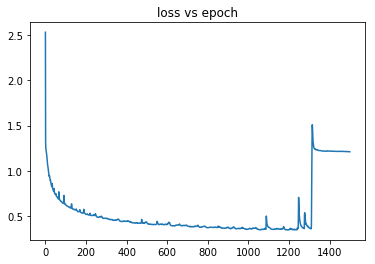

In [129]:
import matplotlib.pyplot as plt

plt.plot([i for i in range(len(new))], new)
plt.title('loss vs epoch')
plt.show()

In [131]:
print(min(new))

0.343542913262
